In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Define the paths to your CSV files
predictions_file_path = 'C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\files\\all_predictions_SP500.csv'
performance_metrics_file_path = 'C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\files\\performance_metrics_SP500.csv'

In [5]:
# Load the CSV files into DataFrames
df_predictions = pd.read_csv(predictions_file_path)
df_performance = pd.read_csv(performance_metrics_file_path)

# Display the loaded data to ensure correctness
print("Predictions Data:")
print(df_predictions.head())
print("\nPerformance Metrics Data:")
print(df_performance)

Predictions Data:
   Raw_Y_Test     Y_Fusion  Naive_Test  ARIMA_Predictions  LR_Predictions  \
0     2832.57  2834.439912     2832.94        2834.023274     2834.992314   
1     2824.23  2834.069912     2832.57        2833.248949     2835.880145   
2     2854.88  2825.729912     2824.23        2826.006463     2826.197127   
3     2800.71  2856.379912     2854.88        2855.530653     2854.371190   
4     2798.36  2802.209912     2800.71        2801.783608     2800.834779   

   MLP_Predictions  LSTM_Predictions  
0      2837.137695       2831.444092  
1      2821.425781       2833.469971  
2      2821.257080       2825.663818  
3      2858.527100       2848.003418  
4      2770.647217       2811.850830  

Performance Metrics Data:
   Models        MAE         MSE
0  Fusion  16.187902  490.912977
1   Naive  16.277100  499.378612
2   ARIMA  16.338302  499.739638
3      LR  16.236584  497.368764
4     MLP  21.615049  775.427551
5    LSTM  21.148510  690.336853


In [7]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

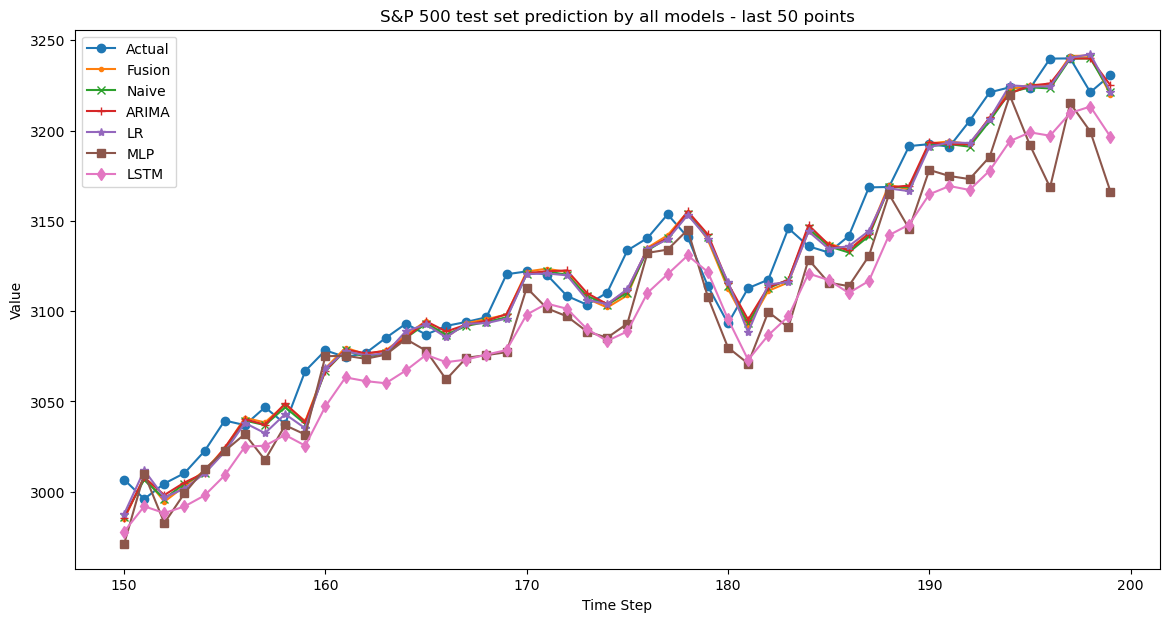

In [11]:
last_50_index = df_predictions.index[-50:]  # Get the index for the last 50 points

plt.figure(figsize=(14, 7))
plt.plot(last_50_index, df_predictions['Raw_Y_Test'][-50:], label='Actual', marker='o')
plt.plot(last_50_index, df_predictions['Y_Fusion'][-50:], label='Fusion', marker='.')
plt.plot(last_50_index, df_predictions['Naive_Test'][-50:], label='Naive', marker='x')
plt.plot(last_50_index, df_predictions['ARIMA_Predictions'][-50:], label='ARIMA', marker='+')
plt.plot(last_50_index, df_predictions['LR_Predictions'][-50:], label='LR', marker='*')
plt.plot(last_50_index, df_predictions['MLP_Predictions'][-50:], label='MLP', marker='s')
plt.plot(last_50_index, df_predictions['LSTM_Predictions'][-50:], label='LSTM', marker='d')

plt.title('S&P 500 test set prediction by all models - last 50 points')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.savefig("C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\figures\\ALL_MODELS_SP500.png", dpi = 300)
plt.show()

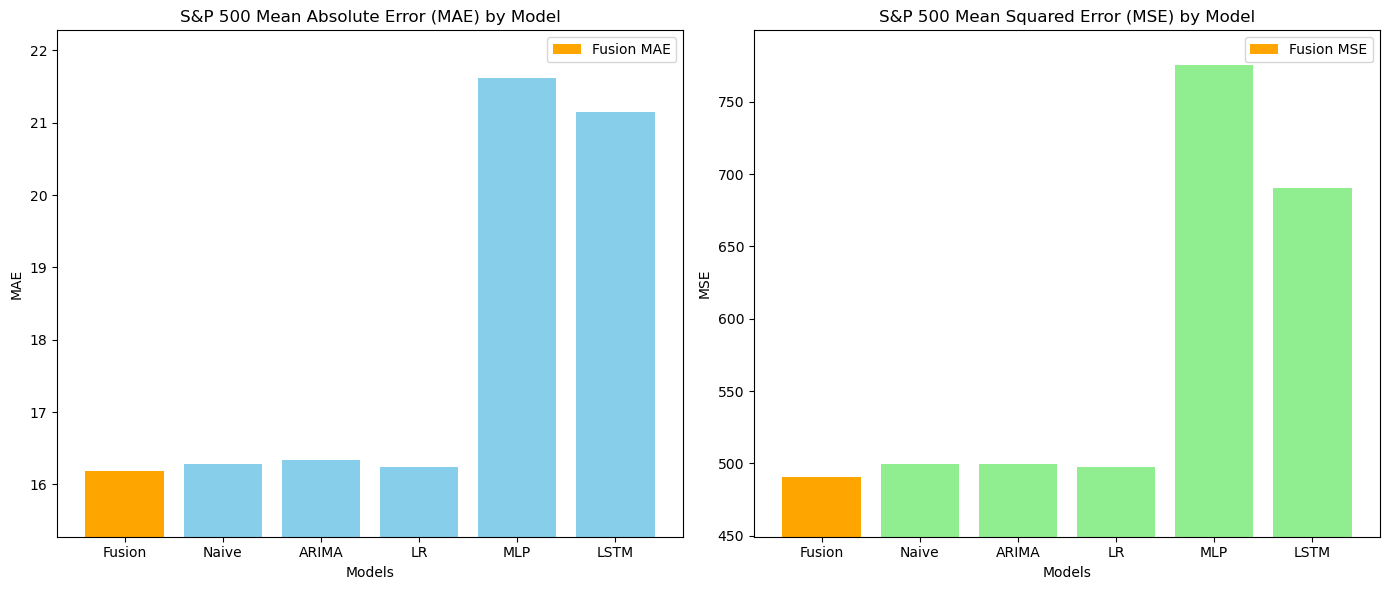

In [39]:
# Define margins
mae_margin = 1
mse_margin = 100

# Get naive MAE and MSE
naive_mae = df_performance['MAE'][df_performance['Models'] == 'Naive'].values[0]
naive_mse = df_performance['MSE'][df_performance['Models'] == 'Naive'].values[0]

# Get fusion method MAE and MSE
fusion_mae = df_performance['MAE'][df_performance['Models'] == 'Fusion'].values[0]
fusion_mse = df_performance['MSE'][df_performance['Models'] == 'Fusion'].values[0]

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for MAE
ax[0].bar(df_performance['Models'], df_performance['MAE'], color='skyblue')
# ax[0].axhline(y=naive_mae, color='r', linestyle='--', label='Naive MAE')
ax[0].bar('Fusion', fusion_mae, color='orange', label='Fusion MAE')
ax[0].set_title('S&P 500 Mean Absolute Error (MAE) by Model')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('MAE')
ax[0].set_ylim([naive_mae - mae_margin, naive_mae + 6 * mae_margin])  # Set y-limits around the naive MAE
ax[0].legend()

# Bar chart for MSE
ax[1].bar(df_performance['Models'], df_performance['MSE'], color='lightgreen')
# ax[1].axhline(y=naive_mse, color='r', linestyle='--', label='Naive MSE')
ax[1].bar('Fusion', fusion_mse, color='orange', label='Fusion MSE')
ax[1].set_title('S&P 500 Mean Squared Error (MSE) by Model')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('MSE')
ax[1].set_ylim([naive_mse - 0.5 * mse_margin, naive_mse + 3 * mse_margin])  # Set y-limits around the naive MSE
ax[1].legend()

plt.tight_layout()
plt.savefig("C:\\Users\\DELL\\Research_projects\\Random_walk_prediction\\figures\\ALL_MODELS_Comparison_SP500.png", dpi=300)
plt.show()